In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

import statsmodels.api as sm 
import statsmodels.formula.api as smf 

from sklearn.preprocessing import scale, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, mean_squared_error
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv("final_version.csv")

## Logistic Regression

In [3]:
df['target'].value_counts()

1    17373
0    14544
Name: target, dtype: int64

In [4]:
df['target'].value_counts(normalize=True)

1    0.544318
0    0.455682
Name: target, dtype: float64

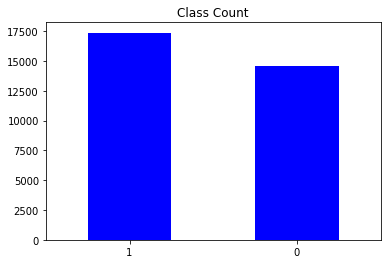

In [5]:
target_count = df.target.value_counts()
target_count.plot(kind='bar', title='Class Count', rot=0, color ="b");

In [6]:
y = df['target']
X = df.drop(['target', 'st_case'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [7]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(solver = 'liblinear')
log_model = log.fit(X,y)
log_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
y_pred = log_model.predict(X)

In [9]:
confusion_matrix(y,y_pred)

array([[ 7499,  7045],
       [ 3812, 13561]], dtype=int64)

In [10]:
accuracy_score(y,y_pred)

0.6598364507942476

In [11]:
log_model.score(X_train,y_train)

0.6573453961539968

In [12]:
log_model.score(X_test,y_test)

0.6697994987468672

In [13]:
accuracy_score(y,y_pred)

0.6598364507942476

In [14]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.52      0.58     14544
           1       0.66      0.78      0.71     17373

    accuracy                           0.66     31917
   macro avg       0.66      0.65      0.65     31917
weighted avg       0.66      0.66      0.65     31917



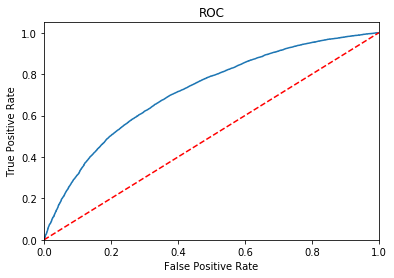

In [15]:
logit_roc_auc = roc_auc_score(y,log_model.predict(X))

fpr, tpr, thresholds = roc_curve(y,log_model.predict_proba(X)[:,1] )
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [16]:
logit_roc_auc

0.6480934351205799

## CART ( Classification and Regression Tree)

In [17]:
y = df['target']
X = df.drop(['target', 'st_case'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [18]:
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train,y_train)

In [19]:
cart_grid = {"max_depth": range(1,10), 
             "min_samples_split": list(range(2,50))}

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
cart = tree.DecisionTreeClassifier()
cart_cv = GridSearchCV(cart,cart_grid, cv = 10,n_jobs=-1,verbose=2)
cart_cv_model = cart_cv.fit(X_train , y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 674 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done 1240 tasks      | elapsed:   31.6s
[Parallel(n_jobs=-1)]: Done 1970 tasks      | elapsed:   55.3s
[Parallel(n_jobs=-1)]: Done 2860 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 3914 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:  3.0min finished


In [22]:
print("Best Parameters:" + str(cart_cv_model.best_params_))

Best Parameters:{'max_depth': 6, 'min_samples_split': 31}


In [23]:
cart = tree.DecisionTreeClassifier(max_depth = 6 , min_samples_split=31)
cart_tuned = cart.fit(X_train, y_train)

In [24]:
y_pred = cart_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.5905388471177945

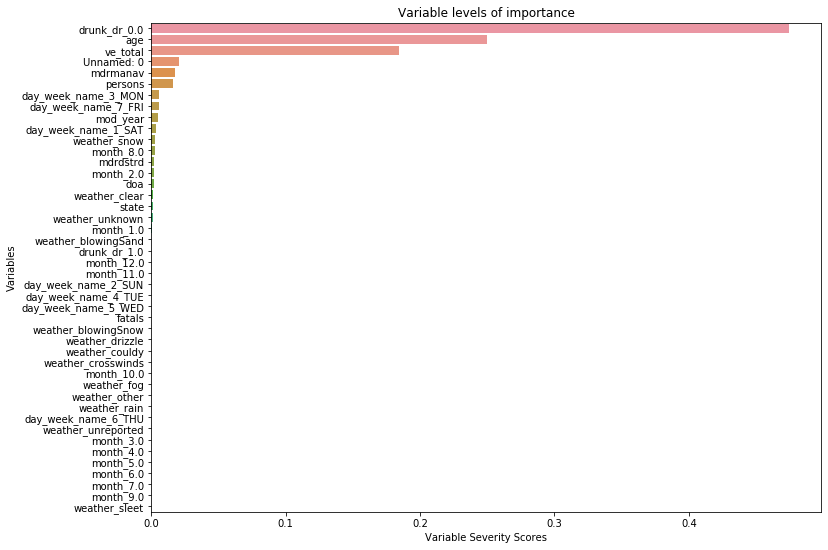

In [25]:
feature_imp = pd.Series(cart_tuned.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 9))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Variable Severity Scores')
plt.ylabel('Variables')
plt.title("Variable levels of importance")
plt.show()

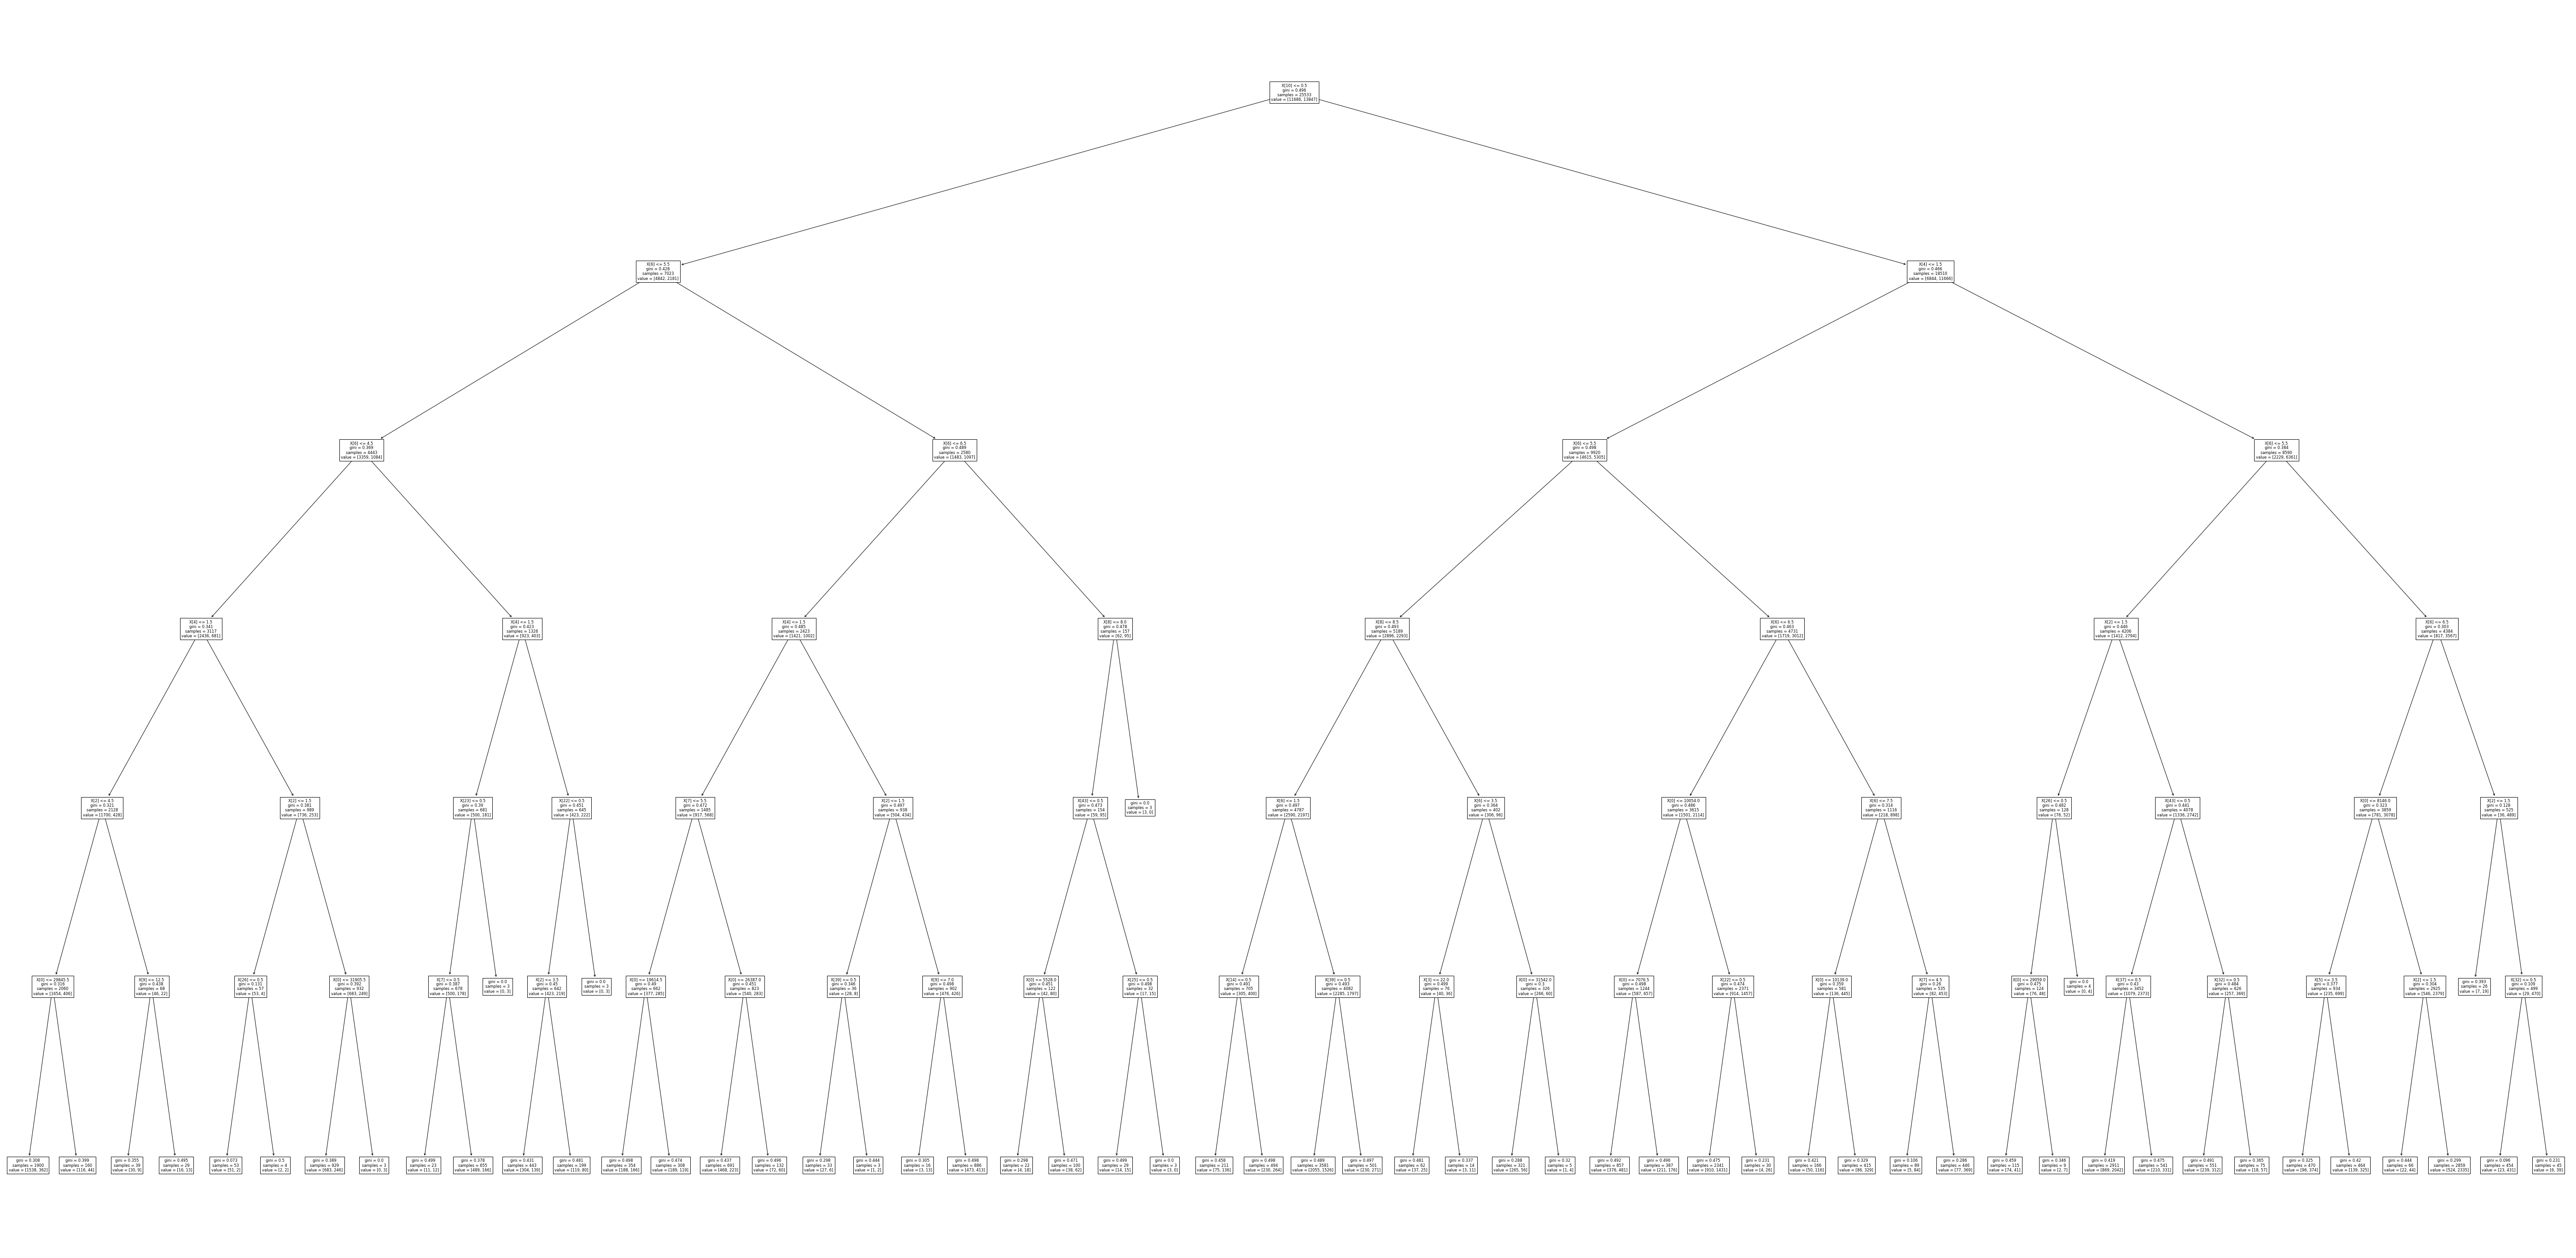

In [26]:
plt.figure(figsize=(100,50))
tree.plot_tree(cart_tuned);

## RANDOM FOREST

In [27]:
rf_model = RandomForestClassifier().fit(X_train, y_train)
rf_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.6560150375939849

In [29]:
rf_params = {"max_depth": [2,5,8,10],
             "max_features": [2,5,8],
             "n_estimators": [10,50,100],
             "min_samples_split": [5,10]}

In [30]:
rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv=10, 
                           n_jobs=-1, 
                           verbose=2)
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  3.3min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [31]:
rf_cv_model.best_params_

{'max_depth': 10,
 'max_features': 8,
 'min_samples_split': 5,
 'n_estimators': 50}

In [32]:
rf_tuned = RandomForestClassifier(max_depth=10,
                                  max_features= 8,
                                  min_samples_split= 5,
                                  n_estimators= 50)
rf_tuned.fit(X_train, y_train)
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.6840538847117794

In [33]:
rf_tuned.score(X_test,y_test)

0.6840538847117794

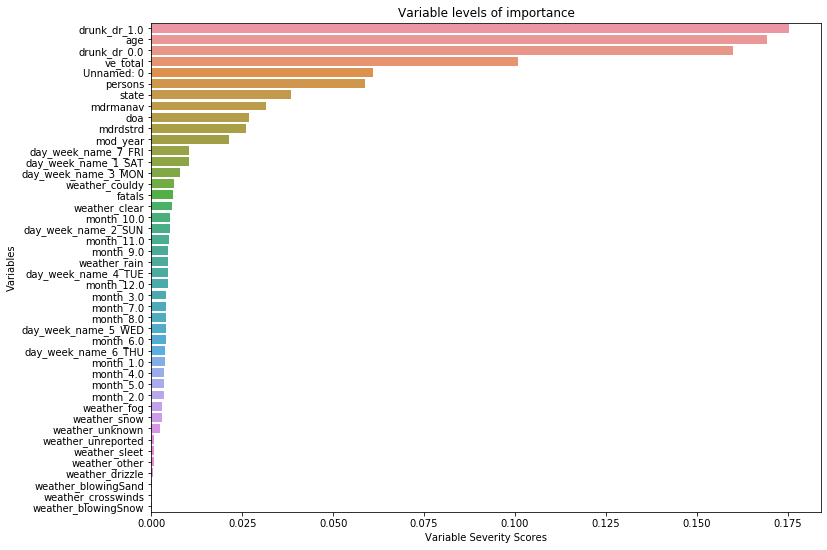

In [34]:
feature_imp = pd.Series(rf_tuned.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 9))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Variable Severity Scores')
plt.ylabel('Variables')
plt.title("Variable levels of importance")
plt.show()

## KNN 

In [35]:
y = df['target']
X = df.drop(['target', 'st_case'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [36]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.5391604010025063
              precision    recall  f1-score   support

           0       0.48      0.47      0.48      2858
           1       0.58      0.59      0.59      3526

    accuracy                           0.54      6384
   macro avg       0.53      0.53      0.53      6384
weighted avg       0.54      0.54      0.54      6384



In [37]:
knn_params = {"n_neighbors": np.arange(1,10),
              "leaf_size": [10,20,30,40,50],
              "algorithm": ["ball_tree", "kd_tree", "brute"],
              "metric": ["euclidean", "minkowski", "manhattan"]}
knn_cv = KNeighborsClassifier()
knn_cv_model = GridSearchCV(knn_cv, knn_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 405 candidates, totalling 4050 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   32.9s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed: 20.4min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 36.9min
[Parallel(n_jobs=-1)]: Done 4050 out of 4050 | elapsed: 37.2min finished


In [38]:
knn_cv_model.best_params_

{'algorithm': 'kd_tree',
 'leaf_size': 10,
 'metric': 'manhattan',
 'n_neighbors': 9}

In [39]:
knn_cv.algorithm = "kd_tree"
knn_cv.n_neighbors = 9
knn_cv.metric = "manhattan"
knn_cv.leaf_size = 10
knn_tuned = knn_cv.fit(X_train, y_train)
y_pred = knn_tuned.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.5548245614035088
              precision    recall  f1-score   support

           0       0.50      0.46      0.48      2858
           1       0.59      0.63      0.61      3526

    accuracy                           0.55      6384
   macro avg       0.55      0.55      0.55      6384
weighted avg       0.55      0.55      0.55      6384



## CATBOOST

In [41]:
y = df['target']
X = df.drop(['target', 'st_case'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [38]:
!pip install catboost

You should consider upgrading via the 'C:\Users\Adnan\anaconda3\python.exe -m pip install --upgrade pip' command.


In [42]:
from catboost import CatBoostClassifier

In [43]:
cat_model = CatBoostClassifier().fit(X_train, y_train)

Learning rate set to 0.041093
0:	learn: 0.6856981	total: 955ms	remaining: 15m 53s
1:	learn: 0.6787913	total: 968ms	remaining: 8m 2s
2:	learn: 0.6729560	total: 982ms	remaining: 5m 26s
3:	learn: 0.6675004	total: 998ms	remaining: 4m 8s
4:	learn: 0.6621342	total: 1.01s	remaining: 3m 21s
5:	learn: 0.6571177	total: 1.02s	remaining: 2m 49s
6:	learn: 0.6531814	total: 1.03s	remaining: 2m 26s
7:	learn: 0.6493761	total: 1.04s	remaining: 2m 9s
8:	learn: 0.6459037	total: 1.06s	remaining: 1m 56s
9:	learn: 0.6427754	total: 1.07s	remaining: 1m 46s
10:	learn: 0.6397613	total: 1.09s	remaining: 1m 37s
11:	learn: 0.6369281	total: 1.1s	remaining: 1m 30s
12:	learn: 0.6344005	total: 1.11s	remaining: 1m 24s
13:	learn: 0.6320534	total: 1.12s	remaining: 1m 19s
14:	learn: 0.6296067	total: 1.14s	remaining: 1m 14s
15:	learn: 0.6273663	total: 1.15s	remaining: 1m 11s
16:	learn: 0.6255292	total: 1.17s	remaining: 1m 7s
17:	learn: 0.6239504	total: 1.18s	remaining: 1m 4s
18:	learn: 0.6223379	total: 1.2s	remaining: 1m 1s

In [44]:
y_pred = cat_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.6879699248120301

In [45]:
catb_params = {"iterations": [200,500],
              "learning_rate": [0.01,0.05,0.1],
              "depth": [3,5,8]}

In [46]:
catb = CatBoostClassifier()

In [47]:
catb_cv = GridSearchCV(catb, catb_params, cv=10, n_jobs=-1, verbose=2)

In [48]:
catb_cv.fit(X_train, y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 16.4min finished


0:	learn: 0.6841345	total: 11ms	remaining: 5.49s
1:	learn: 0.6760359	total: 23.4ms	remaining: 5.83s
2:	learn: 0.6691992	total: 35.6ms	remaining: 5.9s
3:	learn: 0.6625553	total: 47.6ms	remaining: 5.9s
4:	learn: 0.6572626	total: 59.1ms	remaining: 5.85s
5:	learn: 0.6520073	total: 70.5ms	remaining: 5.81s
6:	learn: 0.6475874	total: 82.2ms	remaining: 5.79s
7:	learn: 0.6435987	total: 93.8ms	remaining: 5.77s
8:	learn: 0.6401518	total: 106ms	remaining: 5.77s
9:	learn: 0.6366642	total: 120ms	remaining: 5.86s
10:	learn: 0.6338570	total: 138ms	remaining: 6.13s
11:	learn: 0.6312169	total: 150ms	remaining: 6.08s
12:	learn: 0.6295591	total: 158ms	remaining: 5.9s
13:	learn: 0.6274196	total: 178ms	remaining: 6.18s
14:	learn: 0.6252138	total: 194ms	remaining: 6.28s
15:	learn: 0.6233857	total: 208ms	remaining: 6.28s
16:	learn: 0.6217119	total: 220ms	remaining: 6.25s
17:	learn: 0.6200583	total: 234ms	remaining: 6.27s
18:	learn: 0.6186385	total: 248ms	remaining: 6.29s
19:	learn: 0.6174325	total: 264ms	rema

GridSearchCV(cv=10, error_score=nan,
             estimator=<catboost.core.CatBoostClassifier object at 0x0000023A12DA55C8>,
             iid='deprecated', n_jobs=-1,
             param_grid={'depth': [3, 5, 8], 'iterations': [200, 500],
                         'learning_rate': [0.01, 0.05, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [49]:
print(f"best params: {catb_cv.best_params_}")

best params: {'depth': 5, 'iterations': 500, 'learning_rate': 0.05}


In [50]:
catb = CatBoostClassifier(depth = 5,
                                iterations =500,
                                learning_rate = 0.05)

In [51]:
catb_tuned = catb.fit(X_train, y_train)

0:	learn: 0.6841345	total: 10.3ms	remaining: 5.16s
1:	learn: 0.6760359	total: 21.8ms	remaining: 5.43s
2:	learn: 0.6691992	total: 33.2ms	remaining: 5.49s
3:	learn: 0.6625553	total: 44.3ms	remaining: 5.49s
4:	learn: 0.6572626	total: 55.3ms	remaining: 5.48s
5:	learn: 0.6520073	total: 66.5ms	remaining: 5.47s
6:	learn: 0.6475874	total: 77.8ms	remaining: 5.48s
7:	learn: 0.6435987	total: 90.9ms	remaining: 5.59s
8:	learn: 0.6401518	total: 106ms	remaining: 5.78s
9:	learn: 0.6366642	total: 117ms	remaining: 5.75s
10:	learn: 0.6338570	total: 128ms	remaining: 5.68s
11:	learn: 0.6312169	total: 139ms	remaining: 5.67s
12:	learn: 0.6295591	total: 149ms	remaining: 5.6s
13:	learn: 0.6274196	total: 163ms	remaining: 5.65s
14:	learn: 0.6252138	total: 180ms	remaining: 5.8s
15:	learn: 0.6233857	total: 190ms	remaining: 5.76s
16:	learn: 0.6217119	total: 202ms	remaining: 5.73s
17:	learn: 0.6200583	total: 218ms	remaining: 5.83s
18:	learn: 0.6186385	total: 228ms	remaining: 5.78s
19:	learn: 0.6174325	total: 239ms	r

In [52]:
y_pred = catb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.6893796992481203

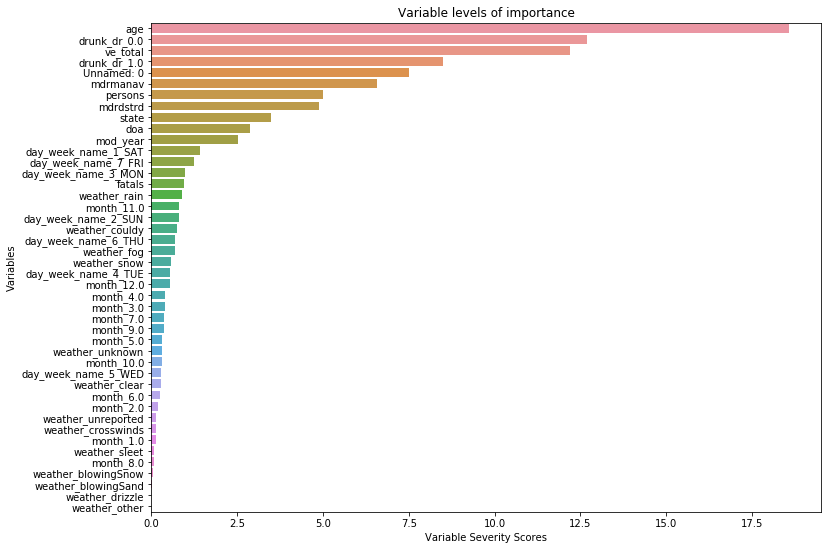

In [53]:
feature_imp = pd.Series(catb_tuned.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 9))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Variable Severity Scores')
plt.ylabel('Variables')
plt.title("Variable levels of importance")
plt.show()

----------------------------
CatBoostClassifier:
Accuracy: 68.9380%
----------------------------
KNeighborsClassifier:
Accuracy: 55.4825%
----------------------------
RandomForestClassifier:
Accuracy: 68.4054%
----------------------------
DecisionTreeClassifier:
Accuracy: 67.7318%
----------------------------
LogisticRegression:
Accuracy: 66.9799%


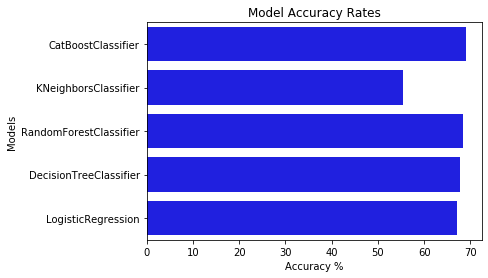

In [54]:
models = [
            catb_tuned ,
            knn_tuned,
            rf_tuned,
            cart_tuned,
            log_model  
]


for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)     
    dogruluk = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(names + ":" )
    print("Accuracy: {:.4%}".format(dogruluk))
result = []

results = pd.DataFrame(columns= ["Models","Accuracy"])

for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)    
    result = pd.DataFrame([[names, dogruluk*100]], columns= ["Models","Accuracy"])
    results = results.append(result)
    
    
sns.barplot(x= 'Accuracy', y = 'Models', data=results, color="b")
plt.xlabel('Accuracy %')
plt.title('Model Accuracy Rates');